## 导入包

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd

## 导入数据

In [2]:
# 写成向左的下划线
data = pd.read_csv('E:/GitProjects/Sklearn/1.DecisionTree/data.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 数据预处理

### 筛选特征

In [7]:
# 删除不想要的列，删除多余的特征
# inplace = True 替换原表 , axis = 1 删除列
data.drop(['Cabin','Name','Ticket'],inplace = True,axis = 1)

In [8]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


### 数据填充

In [9]:
# 数据有一些空白
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
# 用平均值来填补
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [11]:
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

### 删除数据为空的行

In [12]:
# 删掉有缺失值的行或列，适用于有较少缺失值，较多的话用填补
data = data.dropna(axis=0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


### 把非数字型内容变为数字,模型只接受数字型数据

#### 对于10个以内类型的转换,换为下标

In [14]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
# unique代表取出不重复的项 tolist转换为列表形式
labels = data.loc[:,'Embarked'].unique().tolist()

In [16]:
labels

['S', 'C', 'Q']

In [17]:
# 把每一个数据替换为下标 apply(x,y) x为原数据,y为新数据
data.loc[:,'Embarked'] = data.loc[:,'Embarked'].apply(lambda x : labels.index(x))

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


#### 对于两个类型的转换，用布尔类型转换

In [19]:
# adtype转换为另一个类型
data.iloc[:,3] = (data.iloc[:,3] == "male").astype('int')

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


### 特征和标签分开

#### 取出特征

In [21]:
x = data.iloc[:,data.columns != 'Survived']

In [22]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,0
3,4,1,0,35.000000,1,0,53.1000,0
4,5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,0
888,889,3,0,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


#### 取出标签

In [23]:
y = data.iloc[:,data.columns == 'Survived']

In [24]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### 划分数据集和训练集

In [25]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x , y , test_size = 0.3)

In [26]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
727,728,3,0,29.699118,0,0,7.7375,2
277,278,2,1,29.699118,0,0,0.0000,0
507,508,1,1,29.699118,0,0,26.5500,0
76,77,3,1,29.699118,0,0,7.8958,0
827,828,2,1,1.000000,0,2,37.0042,1
...,...,...,...,...,...,...,...,...
36,37,3,1,29.699118,0,0,7.2292,1
356,357,1,0,22.000000,0,1,55.0000,0
660,661,1,1,50.000000,2,0,133.6500,0
77,78,3,1,29.699118,0,0,8.0500,0


#### 索引乱序，重新排序

In [27]:
Xtrain.index

Int64Index([727, 277, 507,  76, 827, 225,  60, 786, 226, 463,
            ...
            802, 553,  58, 837, 388,  36, 356, 660,  77, 215],
           dtype='int64', length=622)

In [28]:
Xtrain.shape

(622, 8)

In [29]:
for i in [Xtrain , Xtest , Ytrain , Ytest]:
    i.index = range(i.shape[0])

In [30]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,728,3,0,29.699118,0,0,7.7375,2
1,278,2,1,29.699118,0,0,0.0000,0
2,508,1,1,29.699118,0,0,26.5500,0
3,77,3,1,29.699118,0,0,7.8958,0
4,828,2,1,1.000000,0,2,37.0042,1
...,...,...,...,...,...,...,...,...
617,37,3,1,29.699118,0,0,7.2292,1
618,357,1,0,22.000000,0,1,55.0000,0
619,661,1,1,50.000000,2,0,133.6500,0
620,78,3,1,29.699118,0,0,8.0500,0


## 训练模型

### 一次验证

In [32]:
clf = DecisionTreeClassifier(random_state = 30)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)

score

0.7228464419475655

### 十次交叉验证

In [37]:
clf = DecisionTreeClassifier(random_state = 30)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7514683350357507

### 调参，改变树的深度

In [50]:
tr = []
cv = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state = 30
                                ,max_depth = i+1
                                ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_cv = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    cv.append(score_cv)

0.8166624106230849


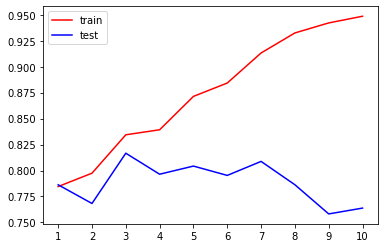

In [51]:
print(max(cv))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),cv,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

### 网格搜索调参

In [55]:
# 在0~0.5之间随机取20个数，也有顺序
gini_thresholds = np.linspace(0,0.5,20)

# 参数和参数的取值范围
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              # 小于信息增益的最小值
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state = 30)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=30),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
        

In [57]:
# 参数的最佳组合
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [58]:
# 最佳参数下的分数
GS.best_score_

0.8328469022017408